In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
df = pd.read_csv("adult.csv")

In [20]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Check for null values and show the datatypes

In [21]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


### Removing ? containing rows

In [22]:
df = df[ (df != '?').all(axis = 1)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Mapping Output

In [23]:
df['income'] = df['income'].map({'<=50K' : 0 , '>50K' : 1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Analyzing Data

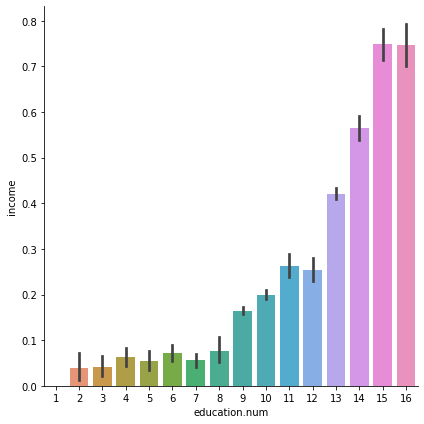

In [24]:
sns.catplot(x='education.num',y='income',data = df, kind = 'bar', height = 6)
plt.show()

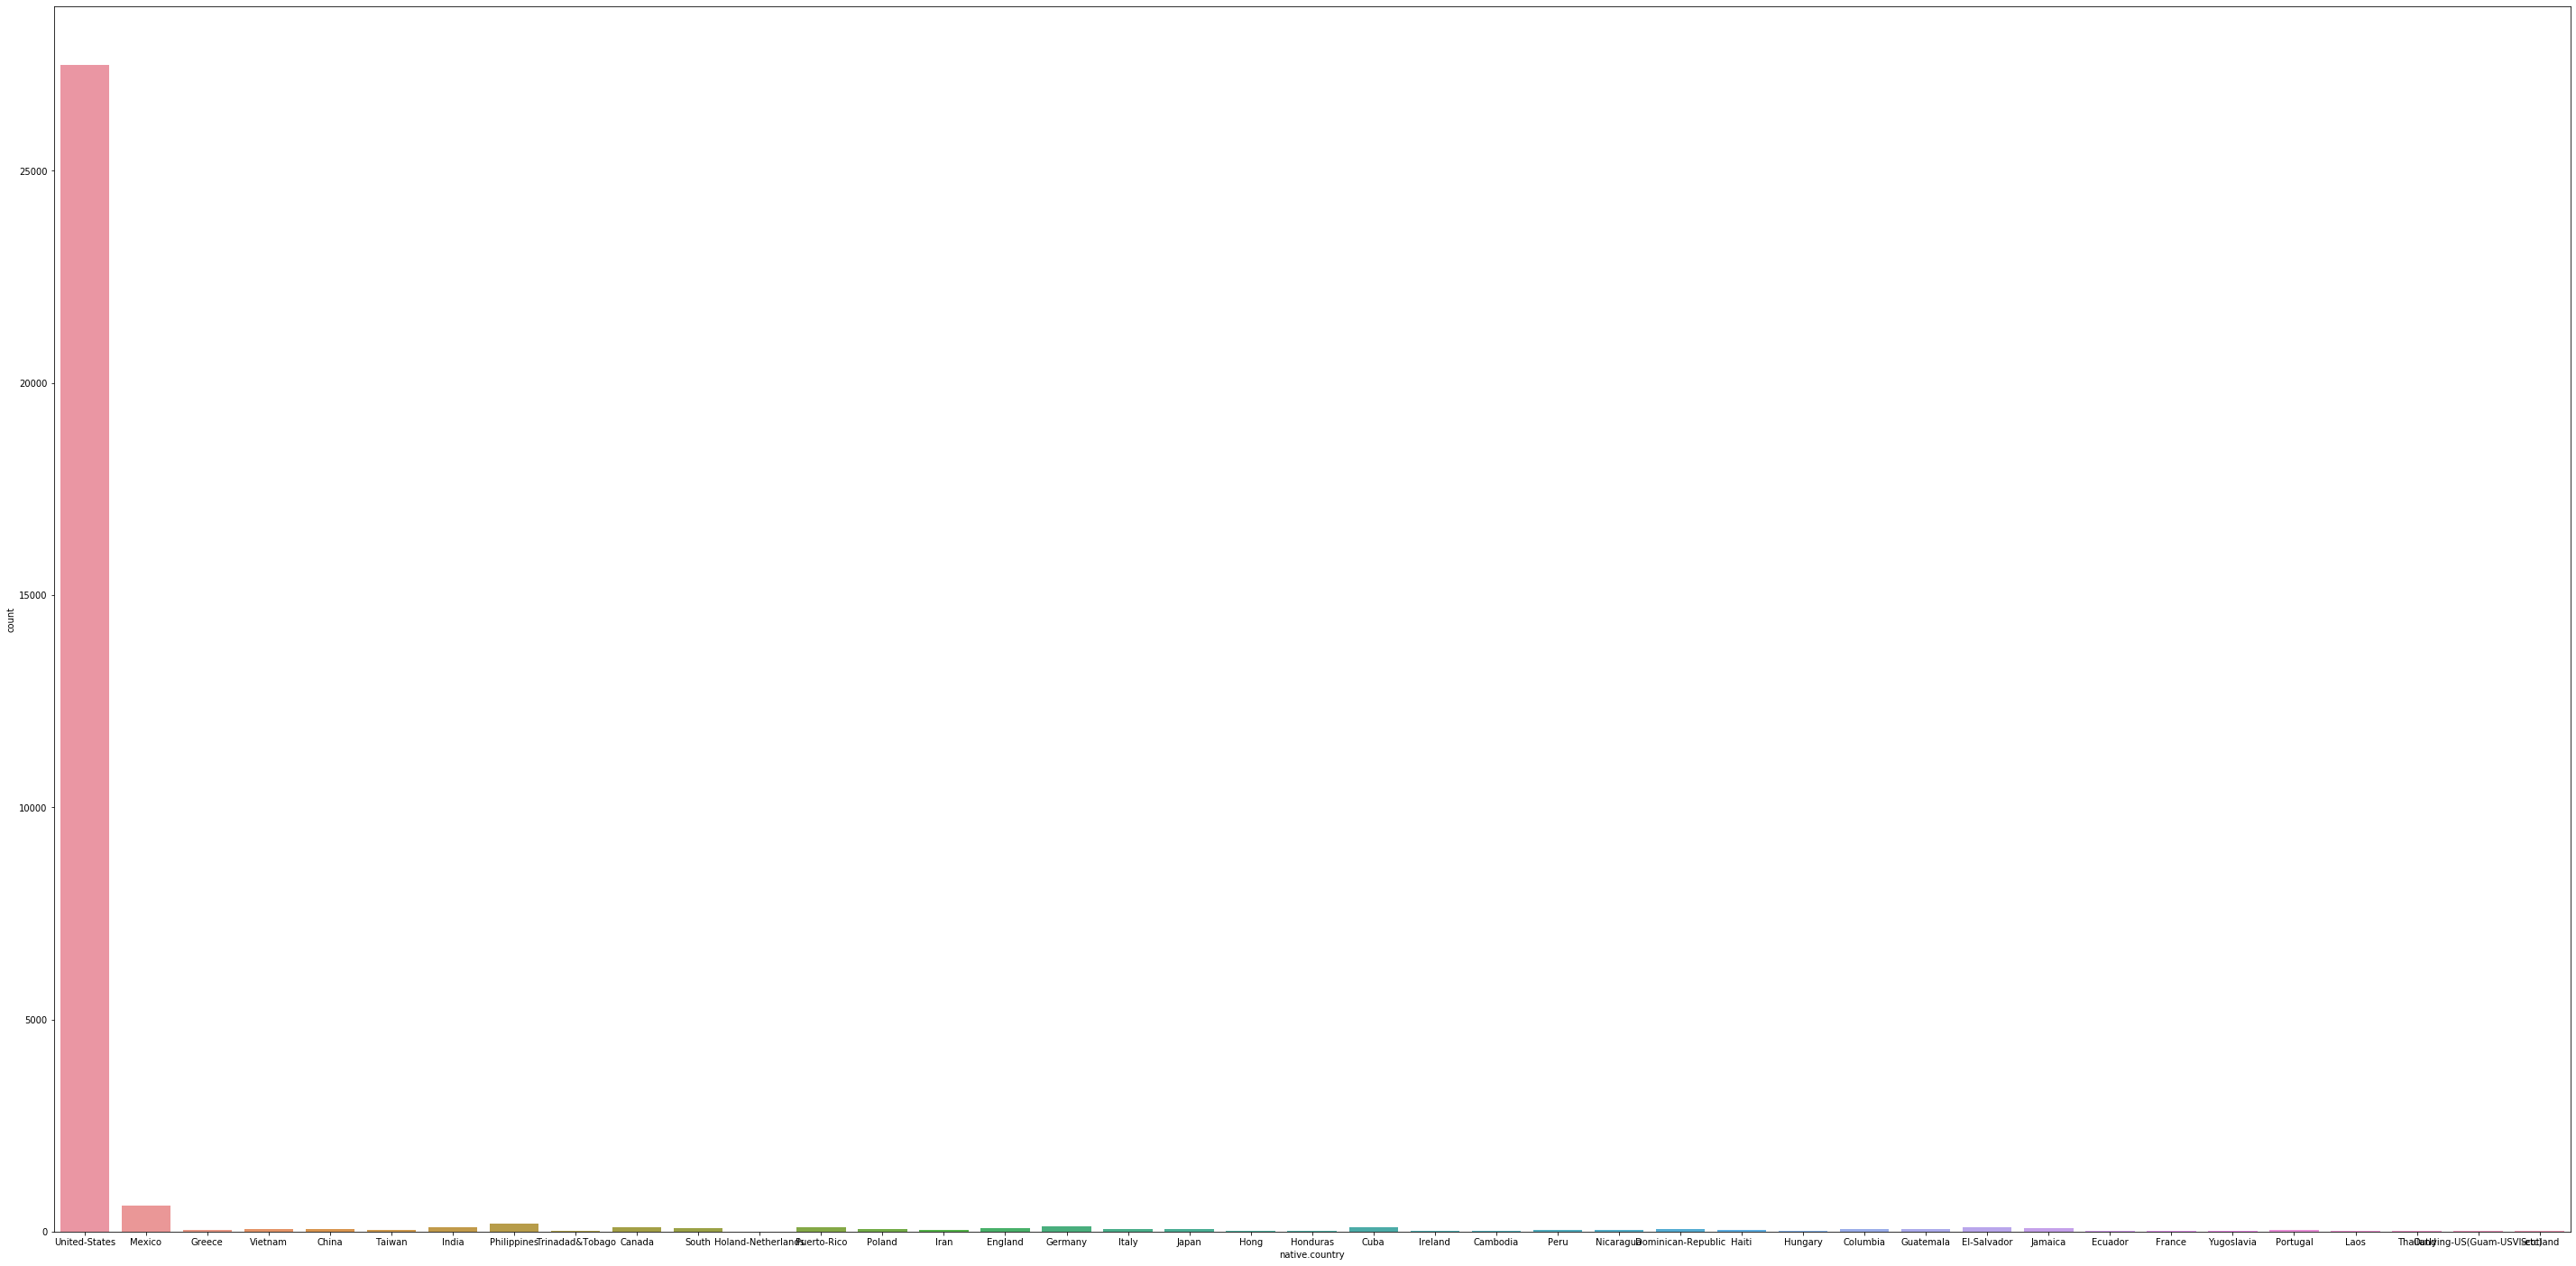

In [25]:
plt.figure(figsize=(50,25))
sns.countplot(x='native.country',data = df)
plt.show()
#Most are from US so drop

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


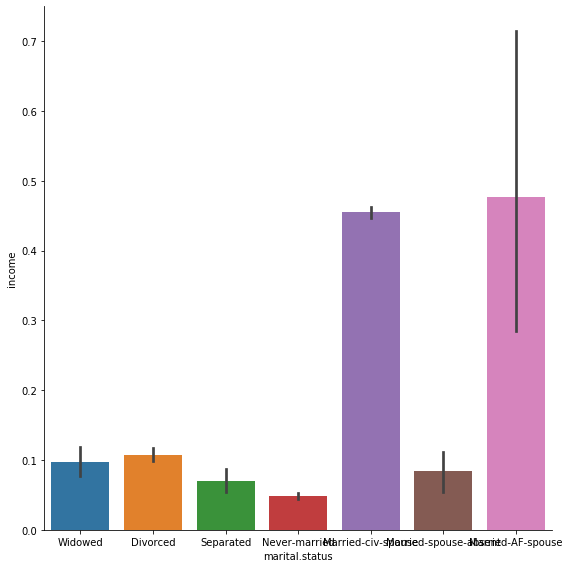

In [26]:
sns.factorplot(x='marital.status',y = 'income',data = df, kind = 'bar', height = 8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


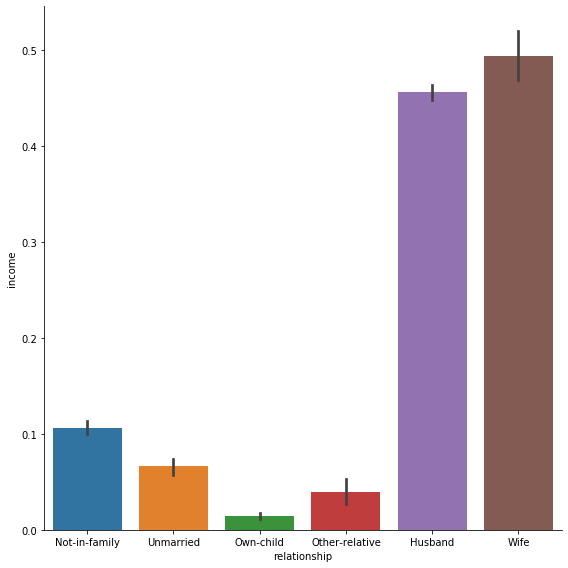

In [27]:
sns.factorplot(x='relationship',y = 'income',data = df, kind = 'bar', height = 8)
plt.show()

# Change Column Values

In [28]:
df['marital.status']=df['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for col in df:
    lbl = LabelEncoder()
    if df[col].dtype == np.object:
        df[col] = lbl.fit_transform(df[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Heatmap

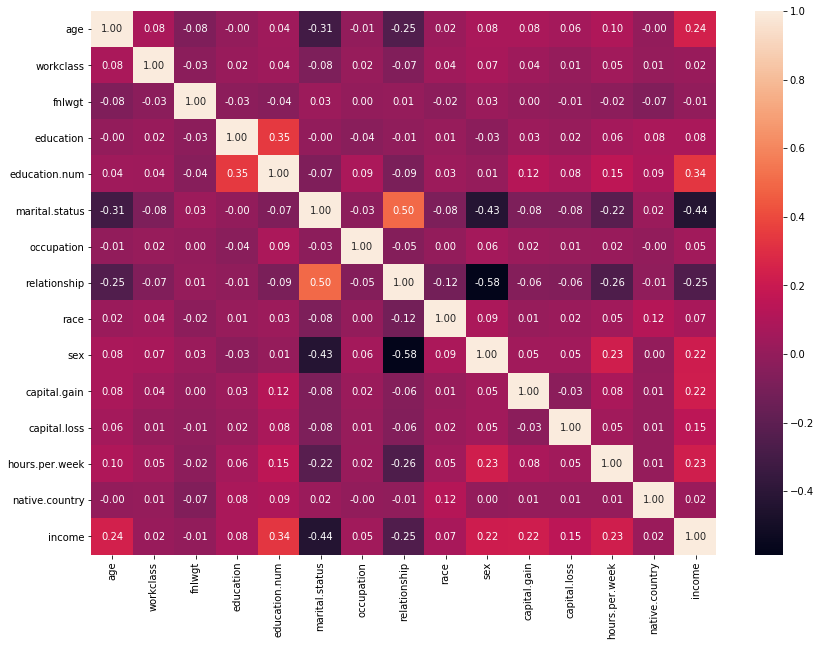

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot = True, fmt ='.2f')
plt.show()

# Dropping Columns

In [31]:
df = df.drop(['relationship','education'],axis=1)
df = df.drop(['occupation','fnlwgt','native.country'],axis=1)

In [32]:
df

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,9,1,4,0,0,4356,18,0
3,54,2,4,1,4,0,0,3900,40,0
4,41,2,10,1,4,0,0,3900,40,0
5,34,2,9,1,4,0,0,3770,45,0
6,38,2,6,1,4,1,0,3770,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,2,10,1,4,1,0,0,40,0
32557,27,2,12,0,4,0,0,0,38,0
32558,40,2,9,0,4,1,0,0,40,1
32559,58,2,9,1,4,0,0,0,40,0


# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,shuffle=False)

# Models

In [34]:
clf = GaussianNB()
cv_res = cross_val_score(clf,X_train,y_train,cv=10)
print(cv_res.mean()*100)

76.68213951528749


In [35]:
clf = DecisionTreeClassifier()

cv_res = cross_val_score(clf,X_train,y_train,cv=10)
print(cv_res.mean()*100)

74.22337486098931


In [36]:
clf = RandomForestClassifier(n_estimators = 100)

cv_res = cross_val_score(clf,X_train,y_train,cv=10)
print(cv_res.mean()*100)

76.5738459051249


# Model Tuning

In [37]:
'''
clf = RandomForestClassifier()
kf = KFold(n_splits = 3)
max_features = np.array([1,2,3,4,5])
n_estimators = np.array([25,50,100,150,200])
min_samples_leaf = np.array([25,50,75,100])
param_grid = dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)

grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres = grid.fit(X_train,y_train)
print("Best Score",gres.best_score_)
print("Params",gres.best_params_)
'''


'\nclf = RandomForestClassifier()\nkf = KFold(n_splits = 3)\nmax_features = np.array([1,2,3,4,5])\nn_estimators = np.array([25,50,100,150,200])\nmin_samples_leaf = np.array([25,50,75,100])\nparam_grid = dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)\n\ngrid = GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)\ngres = grid.fit(X_train,y_train)\nprint("Best Score",gres.best_score_)\nprint("Params",gres.best_params_)\n'

In [38]:
# Output was 
# Best Score 0.8102731591448932
# Params {'max_features': 5, 'min_samples_leaf': 25, 'n_estimators': 200}


In [39]:
clf = RandomForestClassifier(n_estimators = 200,max_features = 5,min_samples_leaf = 25)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Predict

In [40]:
pred = clf.predict(X_test)

# Evaluate

In [41]:
print("Accuracy: %f " % (100 * accuracy_score(y_test,pred)))

Accuracy: 84.800080 


In [ ]:
clf.